In [ ]:
import pandas as pd

# Step 1: Load the dataset
# Assuming 'reduced_player_data.csv' is your dataset
data = pd.read_csv('reduced_football_data.csv')

# Step 2: List the features you want to keep (relevant ones for clustering)
# Exclude columns like 'Player Name', 'Player ID', or any irrelevant features
relevant_features = ['Min', 'MP', 'Starts', '90s', 'Accurate Passes per 90',
                     'Successful Dribbles per 90', 'Clearances per 90',
                     'Interceptions per 90', 'PrgC', 'PrgR']


# Step 3: Filter the dataset to include only the relevant features
filtered_data = data[relevant_features]

# Step 4: Verify the filtered dataset
print(filtered_data.head())

# Step 5: Save the filtered dataset if needed
filtered_data.to_csv('filtered_reduced_player_data.csv', index=False)
print("Filtered dataset saved to 'filtered_reduced_player_data.csv'.")



        Min        MP    Starts       90s  Accurate Passes per 90  \
0 -0.892959 -0.804100 -0.925464 -0.896887               -0.188452   
1 -0.619537 -0.977658 -0.502257 -0.621478               -0.188452   
2 -0.790302 -1.237995 -0.756181 -0.790277               -0.188452   
3 -0.803134 -0.543763 -0.840823 -0.799162               -0.188452   
4  0.433680  0.150469  0.428800  0.435736                0.147974   

   Successful Dribbles per 90  Clearances per 90  Interceptions per 90  \
0                   -0.189768          -0.248495              0.025928   
1                   -0.189768          -0.248495              0.025928   
2                   -0.189768          -0.248495              0.025928   
3                   -0.189768          -0.248495              0.025928   
4                    0.174795           1.224585              3.958401   

       PrgC      PrgR  
0 -0.678069 -0.658059  
1 -0.520064 -0.557089  
2 -0.804473 -0.744605  
3 -0.551665 -0.499392  
4  0.143559  0.03430

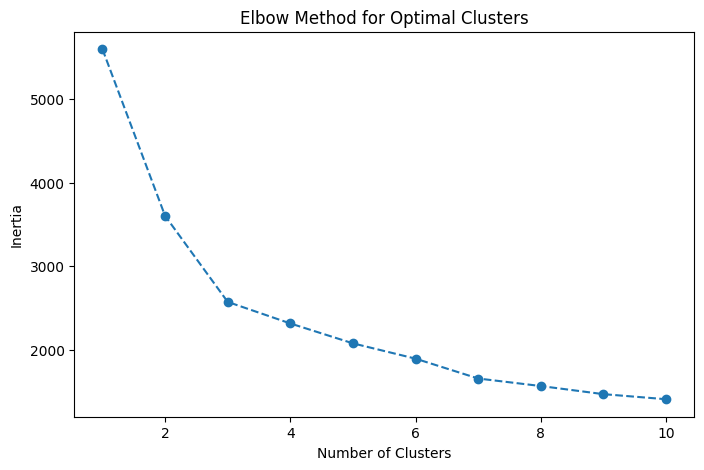

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the reduced dataset
# Replace 'reduced_player_data.csv' with your actual dataset file name
data = pd.read_csv('/content/filtered_reduced_player_data.csv')

# Step 2: Standardize the data (K-Means performs better on scaled data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 3: Determine the optimal number of clusters using the Elbow Method
inertia = []  # List to store inertia (sum of squared distances)
k_range = range(1, 11)  # Test clusters from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_data)

# Step 5: Add the cluster labels to the dataset
data['Cluster'] = kmeans.labels_

# Step 6: Visualize the clusters (for 2D data)
if scaled_data.shape[1] == 2:  # Ensure the dataset is 2D for scatter plot
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=data['Cluster'], palette='viridis')
    plt.title('K-Means Clustering Visualization')
    plt.xlabel('PC1' if 'PC1' in data.columns else 'Feature 1')
    plt.ylabel('PC2' if 'PC2' in data.columns else 'Feature 2')
    plt.legend(title='Cluster')
    plt.show()

# Step 7: Save the clustered data to a file
data.to_csv('clustered_player_data.csv', index=False)
print("Clustered data saved to 'clustered_player_data.csv'.")

Clustered data saved to 'clustered_player_data.csv'.
